<h2 style="text-align:center">Predict the employee attrition rate in organizations</h2>

### Problem Statement 
---
Employees are the most important part of an organization. Successful employees meet deadlines, make sales, and build the brand through positive customer interactions.

Employee attrition is a major cost to an organization and predicting such attritions is the most important requirement of the Human Resources department in many organizations. In this problem, your task is to predict the attrition rate of employees of an organization

---



#### Importing libraries

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error

#### Dataset directory path

In [210]:
dataset_dir='data'

#### Load test and train data

In [211]:
train_data=pd.read_csv(os.path.join(dataset_dir,'Train.csv'))
test_data=pd.read_csv(os.path.join(dataset_dir,'Test.csv'))

#### Print first 5 rows of train data

In [212]:
train_data.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


#### Print shape of train and test data

In [213]:
train_data.shape

(7000, 24)

In [214]:
test_data.shape

(3000, 23)

#### Check column names and their dtypes in train data

In [215]:
train_data.dtypes

Employee_ID                   object
Gender                        object
Age                          float64
Education_Level                int64
Relationship_Status           object
Hometown                      object
Unit                          object
Decision_skill_possess        object
Time_of_service              float64
Time_since_promotion           int64
growth_rate                    int64
Travel_Rate                    int64
Post_Level                     int64
Pay_Scale                    float64
Compensation_and_Benefits     object
Work_Life_balance            float64
VAR1                           int64
VAR2                         float64
VAR3                         float64
VAR4                         float64
VAR5                           int64
VAR6                           int64
VAR7                           int64
Attrition_rate               float64
dtype: object

#### Check null values in train and test data

In [216]:
train_data.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [217]:
test_data.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          161
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service               52
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      3
Compensation_and_Benefits      0
Work_Life_balance              5
VAR1                           0
VAR2                         217
VAR3                           0
VAR4                         298
VAR5                           0
VAR6                           0
VAR7                           0
dtype: int64

#### Handle missing values in train and test data
##### We will use imputation methods to handle null values in train and test data, but before that we need to see the distribution of features having null values

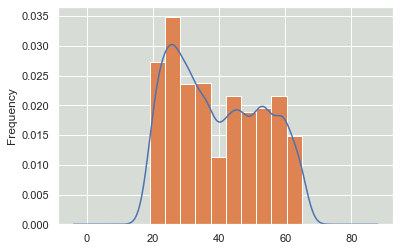

In [218]:
fig, ax = plt.subplots()
train_data['Age'].plot.kde(ax=ax, legend=False)
train_data['Age'].plot.hist(density=True, ax=ax)
ax.set_facecolor('#d8dcd6')

#### Histogram for Age doesn't follow any kind of normal, uniform or skewed distribution so we will use forward filling for imputing values

In [219]:
train_data['Age'].ffill(inplace=True)
test_data['Age'].ffill(inplace=True)

In [220]:
print(train_data.Time_of_service.mode())
print(train_data.Time_of_service.isna().sum())

0    6.0
dtype: float64
144


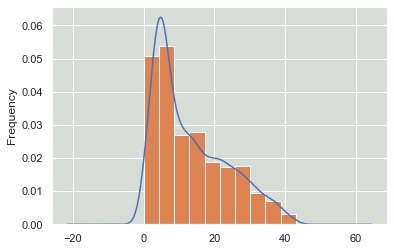

In [221]:
fig, ax = plt.subplots()
train_data['Time_of_service'].plot.kde(ax=ax, legend=False)
train_data['Time_of_service'].plot.hist(density=True, ax=ax)
ax.set_facecolor('#d8dcd6')

#### As graph for Time_of_service is skewed we will impute missing values with median

In [222]:
train_data['Time_of_service'].fillna(train_data['Time_of_service'].mode()[0],inplace=True)
test_data['Time_of_service'].fillna(train_data['Time_of_service'].mode()[0],inplace=True)

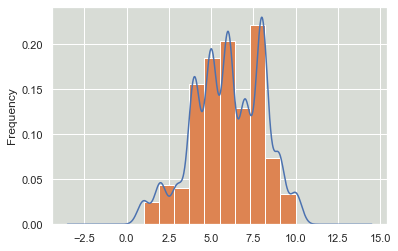

In [223]:
fig, ax = plt.subplots()
train_data['Pay_Scale'].plot.kde(ax=ax, legend=False)
train_data['Pay_Scale'].plot.hist(density=True, ax=ax)
ax.set_facecolor('#d8dcd6')

In [224]:
print(train_data.Pay_Scale.unique())
print(train_data.Pay_Scale.isna().sum())
print(train_data.Pay_Scale.value_counts())

[ 7.  6.  8.  2.  9.  5.  4.  3. 10.  1. nan]
9
8.0     1392
6.0     1284
5.0     1160
4.0      983
7.0      811
9.0      464
2.0      277
3.0      255
10.0     209
1.0      156
Name: Pay_Scale, dtype: int64


In [225]:
test_data.Pay_Scale.isna().sum()

3

#### Histogram for Pay_Scale doesn't follow any kind of normal, uniform or skewed distribution so we will use forward filling for imputing values

In [226]:
train_data['Pay_Scale'].fillna(train_data.Pay_Scale.mode()[0],inplace=True)
test_data['Pay_Scale'].fillna(train_data.Pay_Scale.mode()[0],inplace=True)

In [227]:
print(train_data.Pay_Scale.isna().sum())
print(test_data.Pay_Scale.isna().sum())

0
0


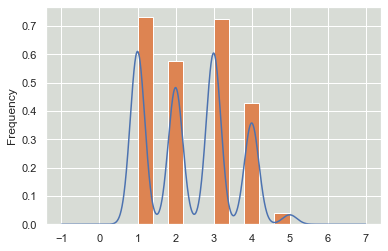

In [228]:
fig, ax = plt.subplots()
train_data['Work_Life_balance'].plot.kde(ax=ax, legend=False)
train_data['Work_Life_balance'].plot.hist(density=True, ax=ax)
ax.set_facecolor('#d8dcd6')

In [229]:
train_data.Work_Life_balance.value_counts()

1.0    2042
3.0    2023
2.0    1615
4.0    1197
5.0     112
Name: Work_Life_balance, dtype: int64

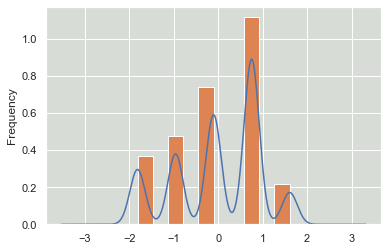

In [230]:
fig, ax = plt.subplots()
train_data['VAR2'].plot.kde(ax=ax, legend=False)
train_data['VAR2'].plot.hist(density=True, ax=ax)
ax.set_facecolor('#d8dcd6')

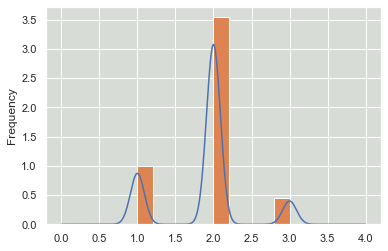

In [231]:
fig, ax = plt.subplots()
train_data['VAR4'].plot.kde(ax=ax, legend=False)
train_data['VAR4'].plot.hist(density=True, ax=ax)
ax.set_facecolor('#d8dcd6')

#### As you can see from above graphs, Work_Life_balance,VAR2,VAR4 are numerical columns but their values are discrete.Hence we can impute missing values with their mode.

In [232]:
train_data['Work_Life_balance'].fillna(train_data['Work_Life_balance'].mode()[0],inplace=True)
test_data['Work_Life_balance'].fillna(train_data['Work_Life_balance'].mode()[0],inplace=True)

In [233]:
train_data['VAR2'].fillna(train_data['VAR2'].mode()[0],inplace=True)
test_data['VAR2'].fillna(train_data['VAR2'].mode()[0],inplace=True)

In [234]:
train_data['VAR4'].fillna(train_data['VAR4'].mode()[0],inplace=True)
test_data['VAR4'].fillna(train_data['VAR4'].mode()[0],inplace=True)

In [235]:
train_data.isnull().sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
Attrition_rate               0
dtype: int64

In [236]:
test_data.isnull().sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
dtype: int64

In [237]:
train_data_copy=train_data.copy()
test_data_copy=test_data.copy()

#### Now we will handle categorical columns , select those columns which have object dtype only

In [238]:
categorical_data=train_data.select_dtypes(include=['object'])

In [239]:
categorical_data.head()

,Employee_ID,Gender,Relationship_Status,Hometown,Unit,Decision_skill_possess,Compensation_and_Benefits
0,EID_23371,F,Married,Franklin,IT,Conceptual,type2
1,EID_18000,M,Single,Springfield,Logistics,Analytical,type2
2,EID_3891,F,Married,Clinton,Quality,Conceptual,type2
3,EID_17492,F,Single,Lebanon,Human Resource Management,Behavioral,type2
4,EID_22534,F,Married,Springfield,Logistics,Conceptual,type3


#### Plot graphs to see frequency distribution of columns

In [240]:
def frequency_distribution(value_count):
    sns.set(style="darkgrid")
    sns.barplot(value_count.index, value_count.values, alpha=0.9)
    plt.show()

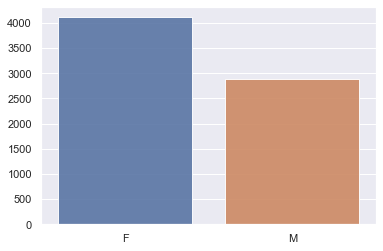

In [241]:
frequency_distribution(categorical_data['Gender'].value_counts())

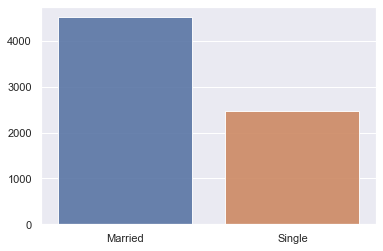

In [242]:
frequency_distribution(categorical_data['Relationship_Status'].value_counts())

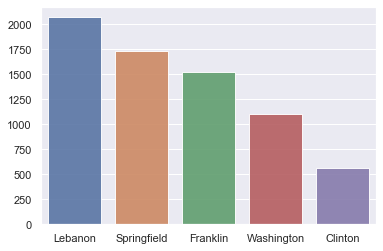

In [243]:
frequency_distribution(categorical_data['Hometown'].value_counts())

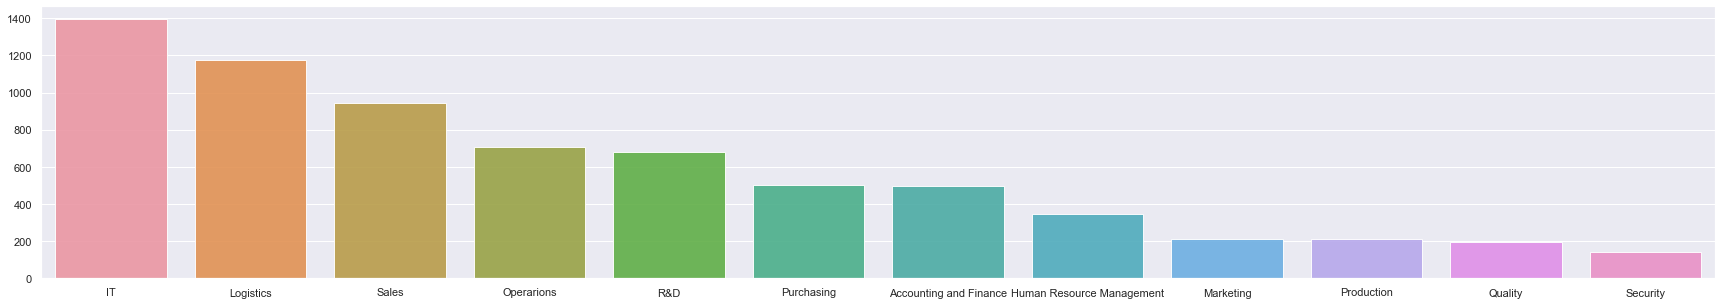

12


In [244]:
plt.figure(figsize=(30,5))
frequency_distribution(categorical_data['Unit'].value_counts())
print(categorical_data['Unit'].value_counts().count())

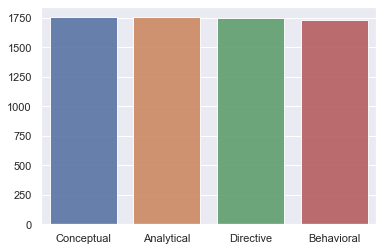

In [245]:
frequency_distribution(categorical_data['Decision_skill_possess'].value_counts())

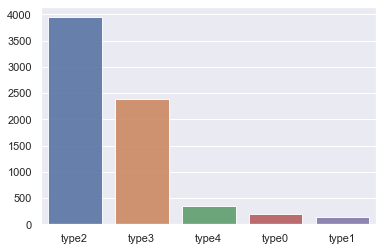

In [246]:
frequency_distribution(categorical_data['Compensation_and_Benefits'].value_counts())


#### As Gender and Relationshup_Status have only two categories, we will map them with 0 and 1.

In [247]:
train_data['Gender']=train_data['Gender'].apply(lambda x : 0 if x=='F' else 1)
test_data['Gender']=test_data['Gender'].apply(lambda x : 0 if x=='F' else 1)

In [248]:
train_data['Relationship_Status']=train_data['Relationship_Status'].apply(lambda x : 0 if x=='Married' else 1)
test_data['Relationship_Status']=test_data['Relationship_Status'].apply(lambda x : 0 if x=='Married' else 1)

In [249]:
train_data.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,0,42.0,4,0,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,1,24.0,3,1,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,0,58.0,3,0,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,0,26.0,3,1,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0.0668
4,EID_22534,0,31.0,1,0,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


#### Hometown and Decision_skill_possess  are nominal variables with 5  and 4 different values respectively so we will use one hot encoding.

In [250]:
hometown_df_train = pd.get_dummies(train_data.Hometown)
hometown_df_test = pd.get_dummies(test_data.Hometown)

train_data = train_data.join(hometown_df_train)
test_data = test_data.join(hometown_df_test)

In [251]:
dskill_df_train = pd.get_dummies(train_data.Decision_skill_possess)
dskill_df_test = pd.get_dummies(test_data.Decision_skill_possess)

train_data = train_data.join(dskill_df_train)
test_data = test_data.join(dskill_df_test)

In [252]:
train_data.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Attrition_rate,Clinton,Franklin,Lebanon,Springfield,Washington,Analytical,Behavioral,Conceptual,Directive
0,EID_23371,0,42.0,4,0,Franklin,IT,Conceptual,4.0,4,...,0.1841,0,1,0,0,0,0,0,1,0
1,EID_18000,1,24.0,3,1,Springfield,Logistics,Analytical,5.0,4,...,0.0670,0,0,0,1,0,1,0,0,0
2,EID_3891,0,58.0,3,0,Clinton,Quality,Conceptual,27.0,3,...,0.0851,1,0,0,0,0,0,0,1,0
3,EID_17492,0,26.0,3,1,Lebanon,Human Resource Management,Behavioral,4.0,3,...,0.0668,0,0,1,0,0,0,1,0,0
4,EID_22534,0,31.0,1,0,Springfield,Logistics,Conceptual,5.0,4,...,0.1827,0,0,0,1,0,0,0,1,0


In [253]:
train_data.drop(['Hometown','Decision_skill_possess'],axis=1,inplace=True)
test_data.drop(['Hometown','Decision_skill_possess'],axis=1,inplace=True)

In [254]:
train_data.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Unit,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,...,Attrition_rate,Clinton,Franklin,Lebanon,Springfield,Washington,Analytical,Behavioral,Conceptual,Directive
0,EID_23371,0,42.0,4,0,IT,4.0,4,33,1,...,0.1841,0,1,0,0,0,0,0,1,0
1,EID_18000,1,24.0,3,1,Logistics,5.0,4,36,0,...,0.0670,0,0,0,1,0,1,0,0,0
2,EID_3891,0,58.0,3,0,Quality,27.0,3,51,0,...,0.0851,1,0,0,0,0,0,0,1,0
3,EID_17492,0,26.0,3,1,Human Resource Management,4.0,3,56,1,...,0.0668,0,0,1,0,0,0,1,0,0
4,EID_22534,0,31.0,1,0,Logistics,5.0,4,62,1,...,0.1827,0,0,0,1,0,0,0,1,0


In [255]:
test_data.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Unit,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,...,VAR7,Clinton,Franklin,Lebanon,Springfield,Washington,Analytical,Behavioral,Conceptual,Directive
0,EID_22713,0,32.0,5,1,R&D,7.0,4,30,1,...,4,0,0,0,1,0,0,0,1,0
1,EID_9658,1,65.0,2,1,IT,41.0,2,72,1,...,2,0,0,1,0,0,0,0,0,1
2,EID_22203,1,52.0,3,0,Sales,21.0,3,25,0,...,3,0,0,0,1,0,0,0,0,1
3,EID_7652,1,50.0,5,1,Marketing,11.0,4,28,1,...,3,0,0,0,0,1,1,0,0,0
4,EID_6516,0,44.0,3,0,R&D,12.0,4,47,1,...,4,0,1,0,0,0,0,0,1,0


#### Compensation_and_Benefits have some order so we will use label encdoing.

In [256]:
label_enc=LabelEncoder()
train_data['Compensation_and_Benefits']=label_enc.fit_transform(train_data['Compensation_and_Benefits'])

In [257]:
test_data['Compensation_and_Benefits']=label_enc.transform(test_data['Compensation_and_Benefits'])

#### Unit column has 12 different categories, we will use Binary Encoding

In [258]:
#!python3 -m pip install category_encoders

In [259]:
# import category_encoders as ce
# enc=ce.BinaryEncoder(cols=['Unit'])
# enc_data=enc.fit_transform(train_data['Unit'])
# train_data=pd.concat([train_data,enc_data],axis=1)

In [260]:
# enc_data=enc.transform(test_data['Unit'])
# test_data=pd.concat([test_data,enc_data],axis=1)

In [261]:
train_data.Unit.unique()

array(['IT', 'Logistics', 'Quality', 'Human Resource Management',
       'Purchasing', 'Sales', 'Production', 'Operarions',
       'Accounting and Finance', 'Marketing', 'R&D', 'Security'],
      dtype=object)

#### Giving order to Unit variable because R&D is on higher level than Sales, and so. 

In [262]:
unit_dict = {'IT':2, 'Logistics':5, 'Quality':4, 'Human Resource Management':9,
       'Purchasing':10, 'Sales':6, 'Production':3, 'Operarions':8,
       'Accounting and Finance':8, 'Marketing':7, 'R&D':1, 'Security':11}

In [263]:
train_data.Unit

0                              IT
1                       Logistics
2                         Quality
3       Human Resource Management
4                       Logistics
                  ...            
6995                   Operarions
6996                          R&D
6997                           IT
6998                        Sales
6999                           IT
Name: Unit, Length: 7000, dtype: object

In [264]:
train_data.Unit = train_data.Unit.map(unit_dict)

In [265]:
train_data.Unit

0       2
1       5
2       4
3       9
4       5
       ..
6995    8
6996    1
6997    2
6998    6
6999    2
Name: Unit, Length: 7000, dtype: int64

In [266]:
test_data.Unit = test_data.Unit.map(unit_dict)

#### As you can see Binary Encoder has made only 4 new columns out of 12 categories unlike One Hot Encoding which had made 12 new columns.

#### We can remove Unit from train and test data and we don't need Empolyee_ID also because each Employee_ID is unique and it won't be useful for the model.

In [267]:
train_data.drop(['Employee_ID'],axis=1,inplace=True)
test_data.drop(['Employee_ID'],axis=1,inplace=True)

In [268]:
train_data.shape

(7000, 30)

In [269]:
test_data.shape

(3000, 29)

#### Print description of data to check if data is on same scale or not.

In [270]:
train_data.describe()

,Gender,Age,Education_Level,Relationship_Status,Unit,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,...,Attrition_rate,Clinton,Franklin,Lebanon,Springfield,Washington,Analytical,Behavioral,Conceptual,Directive
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,...,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,0.412286,39.599286,3.187857,0.354286,5.316571,13.233143,2.367143,47.064286,0.817857,2.798000,...,0.189376,0.080714,0.217571,0.295714,0.248000,0.158000,0.250714,0.248000,0.250857,0.250429
std,0.492281,13.611184,1.065102,0.478330,2.919565,10.310451,1.149395,15.761406,0.648205,1.163721,...,0.185753,0.272415,0.412624,0.456396,0.431883,0.364767,0.433455,0.431883,0.433537,0.433291
min,0.000000,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,27.000000,3.000000,0.000000,2.000000,5.000000,1.000000,33.000000,0.000000,2.000000,...,0.070400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,37.000000,3.000000,0.000000,5.000000,10.000000,2.000000,47.000000,1.000000,3.000000,...,0.142650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,52.000000,4.000000,1.000000,8.000000,20.000000,3.000000,61.000000,1.000000,3.000000,...,0.235000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,65.000000,5.000000,1.000000,11.000000,43.000000,4.000000,74.000000,2.000000,5.000000,...,0.995900,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### As you can see data is not on same scale so we will first scale the data using StandardScaler.
#### There is no need to scale target column so we will first drop it from train_data 

In [271]:
scaler=StandardScaler()
train_data_labels=train_data['Attrition_rate']
train_data=train_data.drop(['Attrition_rate'],axis=1)

In [272]:
train_df= scaler.fit_transform(train_data)
test_df = scaler.transform(test_data)

In [273]:
train_df = pd.DataFrame(train_df,columns=train_data.columns,index=train_data.index)
test_df = pd.DataFrame(test_df,columns=test_data.columns,index=test_data.index)

In [275]:
train_df.describe()

,Gender,Age,Education_Level,Relationship_Status,Unit,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,...,VAR7,Clinton,Franklin,Lebanon,Springfield,Washington,Analytical,Behavioral,Conceptual,Directive
count,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,...,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03
mean,-1.968901e-16,6.474186e-17,3.454776e-16,-5.938107e-17,-1.313870e-16,1.770013e-17,-6.548333e-16,4.891008e-16,-5.941279e-17,-1.387144e-16,...,2.821077e-16,6.789648e-16,-1.765255e-16,-2.918301e-18,-2.810450e-17,5.909559e-16,-6.990281e-16,-8.353001e-16,2.066157e-15,-4.099261e-16
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,...,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00
min,-8.375602e-01,-1.513517e+00,-2.054275e+00,-7.407244e-01,-1.478604e+00,-1.283561e+00,-2.059615e+00,-1.717246e+00,-1.261816e+00,-1.545154e+00,...,-2.439332e+00,-2.963125e-01,-5.273253e-01,-6.479802e-01,-5.742710e-01,-4.331841e-01,-5.784500e-01,-5.742710e-01,-5.786699e-01,-5.780101e-01
25%,-8.375602e-01,-9.257230e-01,-1.763873e-01,-7.407244e-01,-1.136063e+00,-7.985811e-01,-1.189530e+00,-8.923880e-01,-1.261816e+00,-6.857803e-01,...,-2.777617e-01,-2.963125e-01,-5.273253e-01,-6.479802e-01,-5.742710e-01,-4.331841e-01,-5.784500e-01,-5.742710e-01,-5.786699e-01,-5.780101e-01
50%,-8.375602e-01,-1.909806e-01,-1.763873e-01,-7.407244e-01,-1.084388e-01,-3.136016e-01,-3.194455e-01,-4.078970e-03,2.810158e-01,1.735935e-01,...,-2.777617e-01,-2.963125e-01,-5.273253e-01,-6.479802e-01,-5.742710e-01,-4.331841e-01,-5.784500e-01,-5.742710e-01,-5.786699e-01,-5.780101e-01
75%,1.193944e+00,9.111331e-01,7.625566e-01,1.350030e+00,9.191851e-01,6.563574e-01,5.506395e-01,8.842301e-01,2.810158e-01,1.735935e-01,...,8.030233e-01,-2.963125e-01,-5.273253e-01,1.543257e+00,-5.742710e-01,-4.331841e-01,1.728758e+00,-5.742710e-01,1.728101e+00,1.730074e+00
max,1.193944e+00,1.866298e+00,1.701500e+00,1.350030e+00,1.946809e+00,2.887263e+00,1.420724e+00,1.709089e+00,1.823848e+00,1.892341e+00,...,1.883808e+00,3.374816e+00,1.896363e+00,1.543257e+00,1.741338e+00,2.308487e+00,1.728758e+00,1.741338e+00,1.728101e+00,1.730074e+00


## Machine Learning algorithms

---

In [325]:
def makeSubmission(estimator,filename,username):
    predictions=estimator.predict(test_df)
    Employee_ID=pd.read_csv(os.path.join(dataset_dir,'Test.csv'))['Employee_ID']
    submissions=pd.DataFrame({'Employee_ID':Employee_ID,'Attrition_rate':predictions})
    savedAs = 'submission'+'_'+filename+'_'+username
    submissions.to_csv(savedAs+'.csv',index=False)
    print("File saved as {}".format(savedAs))

### Linear regression

In [326]:
#train_X,test_X,train_y,test_y=train_test_split(train_df,train_data_labels,test_size=0.1)
from sklearn.model_selection import cross_validate, cross_val_score

In [327]:
lr=LinearRegression()

In [328]:
cross_val_score(estimator=lr,X=train_df,y=train_data_labels,cv=5)

array([ 0.00715824, -0.01186998, -0.00220851, -0.00873328,  0.00158395])

In [329]:
lr.fit(train_df,train_data_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### Linear Regression submission

In [330]:
makeSubmission(estimator=lr,filename='linear',username='_samar')

File saved as submission_linear__samar


### XGBOOST

In [331]:
from sklearn.ensemble import GradientBoostingRegressor

In [332]:
xgb = GradientBoostingRegressor()

In [333]:
xgb.fit(train_df,train_data_labels)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

#### 2nd submission

In [334]:
makeSubmission(estimator=xgb,filename='xgb',username='_samar')

File saved as submission_xgb__samar


### Lasso Regression

In [335]:
from sklearn.linear_model import Lasso

In [336]:
lasso_reg = Lasso()

In [337]:
lasso_reg.fit(train_df,train_data_labels)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [338]:
test_df.head()

,Gender,Age,Education_Level,Relationship_Status,Unit,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,...,VAR7,Clinton,Franklin,Lebanon,Springfield,Washington,Analytical,Behavioral,Conceptual,Directive
0,-0.837560,-0.558352,1.701500,1.350030,-1.478604,-0.604589,1.420724,-1.082740,0.281016,1.892341,...,0.803023,-0.296312,-0.527325,-0.647980,1.741338,-0.433184,-0.578450,-0.574271,1.728101,-0.578010
1,1.193944,1.866298,-1.115331,1.350030,-1.136063,2.693271,-0.319445,1.582187,0.281016,-1.545154,...,-1.358547,-0.296312,-0.527325,1.543257,-0.574271,-0.433184,-0.578450,-0.574271,-0.578670,1.730074
2,1.193944,0.911133,-0.176387,-0.740724,0.234103,0.753353,0.550639,-1.399993,-1.261816,-1.545154,...,-0.277762,-0.296312,-0.527325,-0.647980,1.741338,-0.433184,-0.578450,-0.574271,-0.578670,1.730074
3,1.193944,0.764185,1.701500,1.350030,0.576644,-0.216606,1.420724,-1.209641,0.281016,-1.545154,...,-0.277762,-0.296312,-0.527325,-0.647980,-0.574271,2.308487,1.728758,-0.574271,-0.578670,-0.578010
4,-0.837560,0.323339,-0.176387,-0.740724,-1.478604,-0.119610,1.420724,-0.004079,0.281016,0.173594,...,0.803023,-0.296312,1.896363,-0.647980,-0.574271,-0.433184,-0.578450,-0.574271,1.728101,-0.578010


In [340]:
makeSubmission(estimator=lasso_reg,filename='lasso',username='samar')

File saved as submission_lasso_samar


### Ridge Regression

In [341]:
from sklearn.linear_model import Ridge

In [342]:
ridge_reg = Ridge()

In [343]:
ridge_reg.fit(train_df,train_data_labels)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [344]:
makeSubmission(estimator=ridge_reg,filename='ridge',username='samar')

File saved as submission_ridge_samar


### XGBOOST Original | Nitika

In [ ]:
makeSubmission(estimator=,filename=,username='nitika')

#### As both of the models are giving about same score, let's try to build a model by selecting 10 best features using f_regression score.

In [211]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [212]:
bestfeatures = SelectKBest(score_func=f_regression, k=10)

In [213]:
fit=bestfeatures.fit(train_df,train_data_labels)

/usr/local/lib64/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib64/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib64/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib64/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [214]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(train_X.columns)

In [215]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

In [216]:
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                        Specs     Score
0                      Gender  5.706395
25                 Behavioral  5.305665
10  Compensation_and_Benefits  4.438039
13                       VAR2  3.831375
11          Work_Life_balance  3.080226
1                         Age  2.488925
29                     Unit_1  2.316298
4             Time_of_service  2.071546
26                 Conceptual  1.921547
8                  Post_Level  1.883242


#### Use only these features to build the model.

In [217]:
imp_features=featureScores['Specs']

In [218]:
train_df1=train_X[imp_features]
test_df1=test_X[imp_features]

In [219]:
xgbRegressor1=xgb.XGBRegressor()

In [220]:
xgbRegressor1.fit(train_df1,train_y)

/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:19:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [221]:
predicted_test_X=xgbRegressor1.predict(test_df1)

In [222]:
mean_squared_error(test_y,predicted_test_X)

0.03482626495015106

#### 3rd submission

In [223]:
test_df1=test_df[imp_features]

In [224]:
predictions=xgbRegressor1.predict(test_df1)

In [225]:
Employee_ID=pd.read_csv(os.path.join(dataset_dir,'Test.csv'))['Employee_ID']

In [226]:
submissions=pd.DataFrame({'Employee_ID':Employee_ID,'Attrition_rate':predictions})

In [227]:
submissions.to_csv('submission_3.csv',index=False) ##score 81.00 

#### So this method of feature selection didn't work out, I have tried with best 10,15,20 best features.

##### Let's print feature importances.

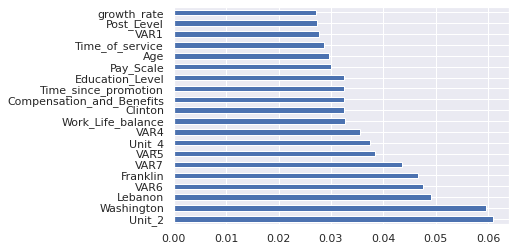

In [228]:
feat_importances = pd.Series(xgbRegressor.feature_importances_, index=train_X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [229]:
imp_features=['VAR1','Lebanon','Compensation_and_Benefits','Education_Level','Clinton','Franklin','Conceptual',
             'Pay_Scale','VAR4','Travel_Rate','Age','VAR5','VAR7','VAR6','growth_rate',
             'Unit_2','Time_of_service','Directive','Work_Life_balance','Relationship_Status']

In [230]:
train_df1=train_X[imp_features]
test_df1=test_X[imp_features]

In [231]:
xgbRegressor2=xgb.XGBRegressor()

In [232]:
xgbRegressor2.fit(train_df1,train_y)

/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:19:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [233]:
predicted_test_X=xgbRegressor2.predict(test_df1)

In [234]:
mean_squared_error(test_y,predicted_test_X)

0.034942357588615615

#### Submission 4

In [235]:
test=test_df[imp_features]

In [236]:
predictions=xgbRegressor2.predict(test)

In [237]:
Employee_ID=pd.read_csv(os.path.join(dataset_dir,'Test.csv'))['Employee_ID']

In [238]:
submissions=pd.DataFrame({'Employee_ID':Employee_ID,'Attrition_rate':predictions})

In [239]:
submissions.to_csv('submission_4.csv',index=False) ##score 81.14

#### Xgboost model with booster = giblinear

In [244]:
xgbRegressor3=xgb.XGBRegressor(booster='gblinear')

In [245]:
xgbRegressor3.fit(train_X,train_y)

[14:25:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [246]:
predicted_test_X=xgbRegressor3.predict(test_X)

In [247]:
mean_squared_error(test_y,predicted_test_X)

0.03424699332840439

#### Submission 5

In [249]:
predictions=xgbRegressor3.predict(test_df)

In [250]:
Employee_ID=pd.read_csv(os.path.join(dataset_dir,'Test.csv'))['Employee_ID']

In [251]:
submissions=pd.DataFrame({'Employee_ID':Employee_ID,'Attrition_rate':predictions})

In [252]:
submissions.to_csv('submission_5.csv',index=False) ##score 81.23

#### Hyperaparameter Tuning for Xgboost

In [285]:
from sklearn.model_selection import GridSearchCV
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [0.01,.03,0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7,0,6],
              'colsample_bytree': [0.7,0.6],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgbRegressor3,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

In [286]:
xgb_grid.fit(train_X,train_y)

Fitting 2 folds for each of 72 candidates, totalling 144 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  9.2min
[Parallel(n_jobs=5)]: Done 144 out of 144 | elapsed: 33.8min finished
/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gblinear',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=...
                                    subsample=1, verbosity=1),
             iid='warn', n_jobs=5,
             param_grid={'colsample_bytree': [0.7, 0.6],
                         'learning_rate': [0.01, 0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7], 'min_child_weight': [4],
                         'n_estimators': [500], 'nthread': [4],
  

In [288]:
predictions_test_X=xgb_grid.predict(test_X)

In [289]:
mean_squared_error(test_y,predicted_test_X)

0.03424699332840439

#### Submission 6

In [290]:
predictions=xgb_grid.predict(test_df)

In [291]:
Employee_ID=pd.read_csv(os.path.join(dataset_dir,'Test.csv'))['Employee_ID']

In [292]:
submissions=pd.DataFrame({'Employee_ID':Employee_ID,'Attrition_rate':predictions})

In [293]:
submissions.to_csv('submission_6.csv',index=False) ##score 81.23

#### As we can notice using ensemble learning and doing feature selection did not help in improving the score.So we will try feature enginnering. We will be using data after imputing missing values.

In [26]:
train_data_f=train_data_copy
test_data_f=test_data_copy

In [27]:
train_data_f.dtypes

Employee_ID                   object
Gender                        object
Age                          float64
Education_Level                int64
Relationship_Status           object
Hometown                      object
Unit                          object
Decision_skill_possess        object
Time_of_service              float64
Time_since_promotion           int64
growth_rate                    int64
Travel_Rate                    int64
Post_Level                     int64
Pay_Scale                    float64
Compensation_and_Benefits     object
Work_Life_balance            float64
VAR1                           int64
VAR2                         float64
VAR3                         float64
VAR4                         float64
VAR5                           int64
VAR6                           int64
VAR7                           int64
Attrition_rate               float64
dtype: object

#### Detecting Outliers in numerical columns

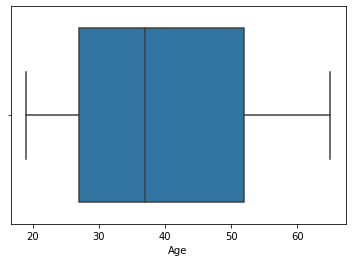

In [28]:
import seaborn as sns
sns.boxplot(x=train_data_f['Age'])

(array([ 893., 1117.,  752.,  757.,  373.,  695.,  610.,  634.,  689.,
         480.]),
 array([19. , 23.6, 28.2, 32.8, 37.4, 42. , 46.6, 51.2, 55.8, 60.4, 65. ]),
 <a list of 10 Patch objects>)

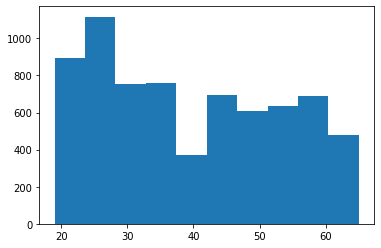

In [29]:
plt.hist(train_data_f['Age'])

#### Age has no outliers and distribution is also not skewed. We will leave this column as it is, if the distribution was skewed we could have used binning.

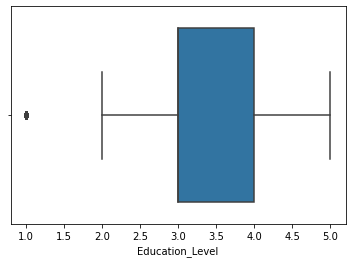

In [30]:
sns.boxplot(x=train_data_f['Education_Level'])

(array([ 695.,    0.,  691.,    0.,    0., 2878.,    0., 2076.,    0.,
         660.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

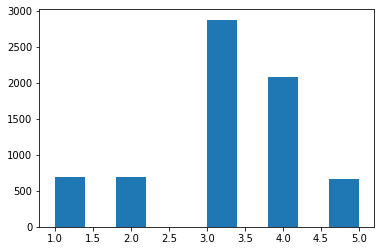

In [31]:
plt.hist(train_data_f['Education_Level'])

In [32]:
train_data_f['Education_Level'].value_counts()

3    2878
4    2076
1     695
2     691
5     660
Name: Education_Level, dtype: int64

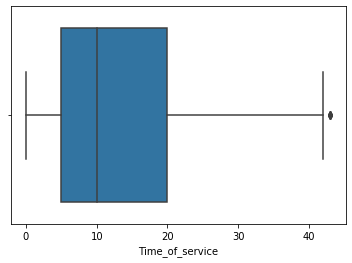

In [33]:
sns.boxplot(x=train_data_f['Time_of_service'])

(array([1496., 1582.,  936.,  822.,  555.,  510.,  516.,  277.,  210.,
          96.]),
 array([ 0. ,  4.3,  8.6, 12.9, 17.2, 21.5, 25.8, 30.1, 34.4, 38.7, 43. ]),
 <a list of 10 Patch objects>)

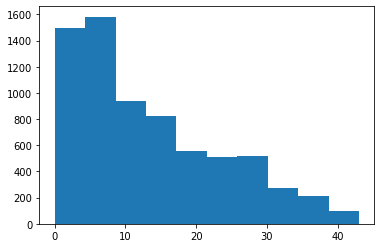

In [34]:
plt.hist(train_data_f['Time_of_service'])

#### Data is skewed we can apply binning to it.

In [35]:
quantile_list = [0, .25, .5, .75, 1.]
quantiles = train_data_f['Time_of_service'].quantile(quantile_list)
quantiles

0.00     0.0
0.25     5.0
0.50    10.0
0.75    20.0
1.00    43.0
Name: Time_of_service, dtype: float64

In [36]:
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
train_data_f['Time_of_service'] = pd.qcut(
                                            train_data_f['Time_of_service'], 
                                            q=quantile_list,       
                                            labels=quantile_labels)

In [37]:
test_data_f['Time_of_service']=pd.qcut(test_data_f['Time_of_service'],
                                      q=quantile_list,
                                      labels=quantile_labels)

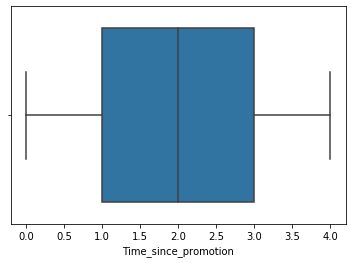

In [43]:
sns.boxplot(x=train_data_f['Time_since_promotion'])


(array([ 162.,    0., 1819.,    0.,    0., 1811.,    0., 1703.,    0.,
        1505.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

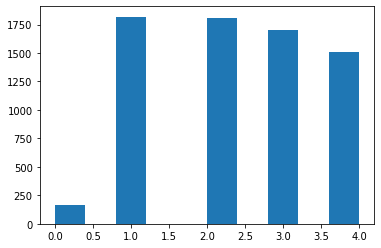

In [39]:
plt.hist(train_data_f['Time_since_promotion'])

In [267]:
train_data_f['Time_since_promotion'].value_counts()

1    1819
2    1811
3    1703
4    1505
0     162
Name: Time_since_promotion, dtype: int64

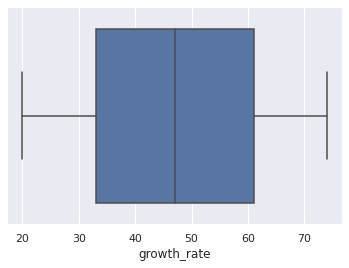

In [268]:
sns.boxplot(x=train_data_f['growth_rate'])

(array([755., 631., 758., 631., 631., 780., 636., 794., 652., 732.]),
 array([20. , 25.4, 30.8, 36.2, 41.6, 47. , 52.4, 57.8, 63.2, 68.6, 74. ]),
 <a list of 10 Patch objects>)

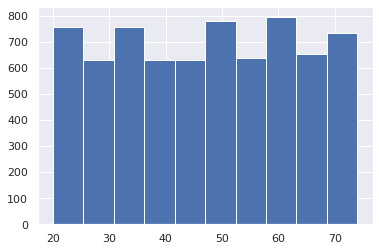

In [269]:
plt.hist(train_data_f['growth_rate'])

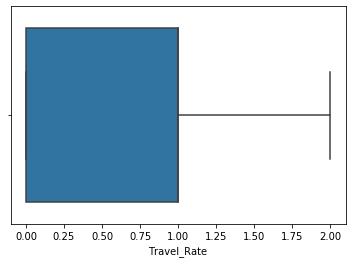

In [45]:
sns.boxplot(x=train_data_f['Travel_Rate'])


(array([2224.,    0.,    0.,    0.,    0., 3827.,    0.,    0.,    0.,
         949.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

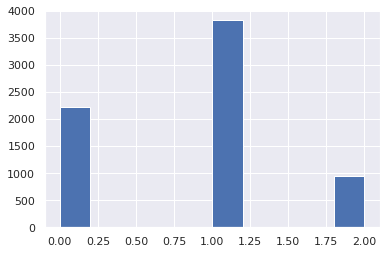

In [271]:
plt.hist(train_data_f['Travel_Rate'])

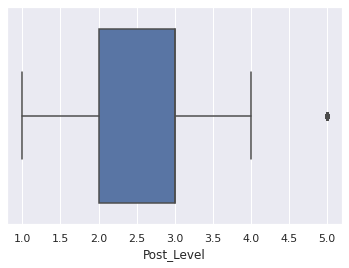

In [272]:
sns.boxplot(x=train_data_f['Post_Level'])

(array([1035.,    0., 1786.,    0.,    0., 2435.,    0., 1046.,    0.,
         698.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

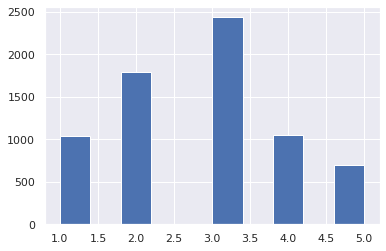

In [273]:
plt.hist(train_data_f['Post_Level'])

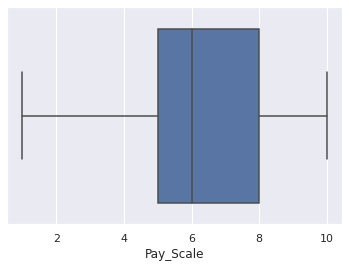

In [274]:
sns.boxplot(x=train_data_f['Pay_Scale'])

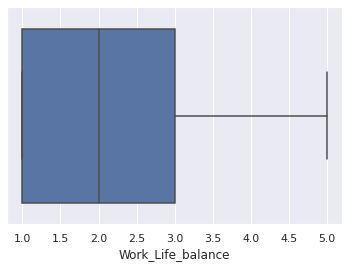

In [158]:
sns.boxplot(x=train_data_f['Work_Life_balance'])

(array([ 157.,  277.,  256.,  984., 1160., 1287.,  811., 1395.,  464.,
         209.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

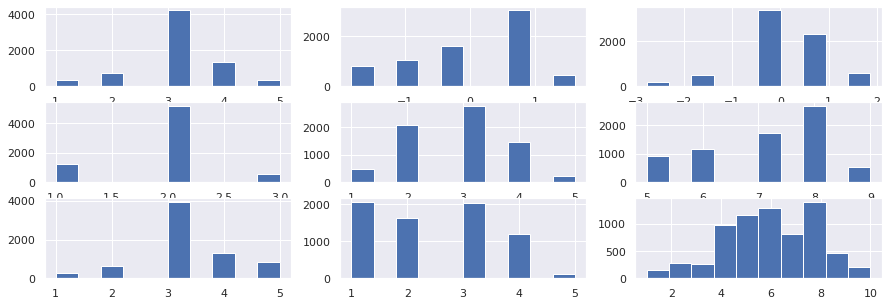

In [159]:
fig, ax = plt.subplots(3, 3,figsize=(15,5))
ax[0][0].hist(train_data_f['VAR1'])
ax[0][1].hist(train_data_f['VAR2'])
ax[0][2].hist(train_data_f['VAR3'])
ax[1][0].hist(train_data_f['VAR4'])
ax[1][1].hist(train_data_f['VAR5'])
ax[1][2].hist(train_data_f['VAR6'])
ax[2][0].hist(train_data_f['VAR7'])
ax[2][1].hist(train_data_f['Work_Life_balance'])
ax[2][2].hist(train_data_f['Pay_Scale'])

#### As you can notice these columns have categrories,they act like more as categorical variable than continous numerical variable.

#### For Gender and Relationship_Status we will use the same approach of mapping as we used above since they only have two categories.

In [161]:
train_data_f['Gender']=train_data_f['Gender'].apply(lambda x : 0 if x=='F' else 1)
test_data_f['Gender']=test_data_f['Gender'].apply(lambda x : 0 if x=='F' else 1)

In [162]:
train_data_f['Relationship_Status']=train_data_f['Relationship_Status'].apply(lambda x : 0 if x=='Married' else 1)
test_data_f['Relationship_Status']=test_data_f['Relationship_Status'].apply(lambda x : 0 if x=='Married' else 1)

In [163]:
train_data_f['Compensation_and_Benefits'].value_counts()

2    3945
3    2382
1     673
Name: Compensation_and_Benefits, dtype: int64

#### As Compensation_and_Benefits have two categories which have very high numbers compared to other three, we will map all other categories with 0.

In [164]:
train_data_f['Compensation_and_Benefits']=train_data_f['Compensation_and_Benefits'].apply(lambda x : 2 if x=='type2' else 3 if x=='type3' else 1)
test_data_f['Compensation_and_Benefits']=test_data_f['Compensation_and_Benefits'].apply(lambda x : 2 if x=='type2' else 3 if x=='type3' else 1)

In [165]:
train_data_f['Decision_skill_possess'].value_counts()

Conceptual    1756
Analytical    1755
Directive     1753
Behavioral    1736
Name: Decision_skill_possess, dtype: int64

#### Let's do one hot encoding on Decision_skill_possess, as we used OneHotEncoder earlier we will use get_dummies this time.(You can use OneHotEncoder also)We will use drop_first=True to leave one column as it can be generated using others.

In [167]:
new_data=pd.get_dummies(train_data_f['Decision_skill_possess'],drop_first=True)

In [168]:
new_data_test=pd.get_dummies(test_data_f['Decision_skill_possess'],drop_first=True)

In [169]:
train_data_f=pd.concat([train_data_f,new_data],axis=1)

In [170]:
test_data_f=pd.concat([test_data_f,new_data_test],axis=1)

In [171]:
train_data_f.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,VAR5,VAR6,VAR7,Attrition_rate,Behavioral,Conceptual,Directive,Behavioral,Conceptual,Directive
0,EID_23371,1,42.0,4,1,Franklin,IT,Conceptual,0-25Q,4,...,4,5,3,0.1841,0,1,0,0,1,0
1,EID_18000,1,24.0,3,1,Springfield,Logistics,Analytical,0-25Q,4,...,3,5,3,0.0670,0,0,0,0,0,0
2,EID_3891,1,58.0,3,1,Clinton,Quality,Conceptual,75-100Q,3,...,3,8,3,0.0851,0,1,0,0,1,0
3,EID_17492,1,26.0,3,1,Lebanon,Human Resource Management,Behavioral,0-25Q,3,...,3,7,3,0.0668,1,0,0,1,0,0
4,EID_22534,1,31.0,1,1,Springfield,Logistics,Conceptual,0-25Q,4,...,2,8,2,0.1827,0,1,0,0,1,0


#### Remove Decision_skill_possess from train and test data

In [172]:
train_data_f=train_data_f.drop('Decision_skill_possess',axis=1)
test_data_f=test_data_f.drop('Decision_skill_possess',axis=1)